In [33]:
import pandas as pd # for data manipulation
import numpy as np # for numerical operations
import matplotlib.pyplot as plt # for plotting
import seaborn as sns # for advanced plotting  


In [34]:
df  = pd.read_csv('mymoviedb.csv', lineterminator='\n') # lineterminator is used to avoid error while reading the csv file
df.head(5)


,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021-12-15,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022-03-01,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022-02-25,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,2021-11-24,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,2021-12-22,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...


In [35]:
df.info() # to get a summary of the dataframe


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9827 entries, 0 to 9826
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Release_Date       9827 non-null   object 
 1   Title              9827 non-null   object 
 2   Overview           9827 non-null   object 
 3   Popularity         9827 non-null   float64
 4   Vote_Count         9827 non-null   int64  
 5   Vote_Average       9827 non-null   float64
 6   Original_Language  9827 non-null   object 
 7   Genre              9827 non-null   object 
 8   Poster_Url         9827 non-null   object 
dtypes: float64(2), int64(1), object(6)
memory usage: 691.1+ KB


In [36]:
df.duplicated().sum() # to check for duplicate rows

np.int64(0)

In [37]:
df.describe() # to get statistical summary of numerical columns

,Popularity,Vote_Count,Vote_Average
count,9827.000000,9827.000000,9827.000000
mean,40.326088,1392.805536,6.439534
std,108.873998,2611.206907,1.129759
min,13.354000,0.000000,0.000000
25%,16.128500,146.000000,5.900000
50%,21.199000,444.000000,6.500000
75%,35.191500,1376.000000,7.100000
max,5083.954000,31077.000000,10.000000


### Exploration Summary

### 1.we have a dataframe consisting of 9827 rows and 9 columns.
### 2.our dataset looks a bit tidy with no NaNs no duplicated values.
### 3.Release_Date column needs to be casted into date time and to extract only the year value.
### 4.Overview, Original _ Languege and Poster-Url wouldn't be so useful during analysis, so we'll drop them.
### 5.there is noticable outliers in Popularity column
### 6.Vote Average bettter be categorised for proper analysis.
### 7.Genre column has comma saperated values and white spaces that needs to be handled and casted into category.

In [38]:
df["Release_Date"] = pd.to_datetime(df["Release_Date"]) # changing the datatype of Release_Date column to datetime

print(df["Release_Date"].dtype) # checking the datatype of Release_Year column

datetime64[ns]


In [39]:
df["Release_Date"]=df["Release_Date"].dt.year # extracting year from Release_Date column
print(df["Release_Date"].dtype) # checking the datatype of Release_Year column

int32


In [40]:
df.head(5)

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,2021,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,2021,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...


In [41]:
# removing unwanted columns Overview, Original_Language, Poster_Url
df.drop(columns=["Overview", "Original_Language", "Poster_Url"], inplace=True) # inplace=True is used to make changes in the original dataframe
df.head(5)


,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,8.3,"Action, Adventure, Science Fiction"
1,2022,The Batman,3827.658,1151,8.1,"Crime, Mystery, Thriller"
2,2022,No Exit,2618.087,122,6.3,Thriller
3,2021,Encanto,2402.201,5076,7.7,"Animation, Comedy, Family, Fantasy"
4,2021,The King's Man,1895.511,1793,7.0,"Action, Adventure, Thriller, War"


### 1.categorizing vote_average column into 4 categories Excellent, Good, Average, Poor based on the following criteria 


In [42]:
# Categorize Vote_Average into 4 categories 
bins = [0, 5, 6.5, 8, 10] # bins used to categorize the Vote_Average column
labels = ['Poor', 'Average', 'Good', 'Excellent'] # labels used for categorization
df['Vote_Category'] = pd.cut(df['Vote_Average'], bins=bins, labels=labels, include_lowest=True)  #pd.cut is used to categorize the Vote_Average column and create a new column Vote_Category
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre,Vote_Category
0,2021,Spider-Man: No Way Home,5083.954,8940,8.3,"Action, Adventure, Science Fiction",Excellent
1,2022,The Batman,3827.658,1151,8.1,"Crime, Mystery, Thriller",Excellent
2,2022,No Exit,2618.087,122,6.3,Thriller,Average
3,2021,Encanto,2402.201,5076,7.7,"Animation, Comedy, Family, Fantasy",Good
4,2021,The King's Man,1895.511,1793,7.0,"Action, Adventure, Thriller, War",Good


In [43]:
df["Vote_Category"].value_counts() # to check the count of each category in Vote_Average column

Vote_Category
Good         4548
Average      4273
Poor          692
Excellent     314
Name: count, dtype: int64

In [ ]:
df.dropna(inplace = True) # to remove rows with null values
df.isna().sum() # to check for null values in each column

Release_Date     0
Title            0
Popularity       0
Vote_Count       0
Vote_Average     0
Genre            0
Vote_Category    0
dtype: int64

### 1.we splid genres into a list and then expolode our datafrme to have only one genre per row

In [45]:
df["Genre"] = df["Genre"].str.split(",") # splitting the Genre column into a list of genres
df = df.explode("Genre").reset_index(drop=True) # exploding the dataframe to have only one genre per row
df.head(10)

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre,Vote_Category
0,2021,Spider-Man: No Way Home,5083.954,8940,8.3,Action,Excellent
1,2021,Spider-Man: No Way Home,5083.954,8940,8.3,Adventure,Excellent
2,2021,Spider-Man: No Way Home,5083.954,8940,8.3,Science Fiction,Excellent
3,2022,The Batman,3827.658,1151,8.1,Crime,Excellent
4,2022,The Batman,3827.658,1151,8.1,Mystery,Excellent
5,2022,The Batman,3827.658,1151,8.1,Thriller,Excellent
6,2022,No Exit,2618.087,122,6.3,Thriller,Average
7,2021,Encanto,2402.201,5076,7.7,Animation,Good
8,2021,Encanto,2402.201,5076,7.7,Comedy,Good
9,2021,Encanto,2402.201,5076,7.7,Family,Good


In [46]:
# casting column into category datatype
df["Genre"] = df["Genre"].astype("category") # casting Genre column into category datatype
df["Genre"].dtype # checking the datatype of Genre column


CategoricalDtype(categories=[' Action', ' Adventure', ' Animation', ' Comedy', ' Crime',
                  ' Documentary', ' Drama', ' Family', ' Fantasy', ' History',
                  ' Horror', ' Music', ' Mystery', ' Romance',
                  ' Science Fiction', ' TV Movie', ' Thriller', ' War',
                  ' Western', 'Action', 'Adventure', 'Animation', 'Comedy',
                  'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy',
                  'History', 'Horror', 'Music', 'Mystery', 'Romance',
                  'Science Fiction', 'TV Movie', 'Thriller', 'War', 'Western'],
, ordered=False, categories_dtype=object)

In [47]:
df.nunique() # to check the number of unique values in each column


Release_Date      102
Title            9513
Popularity       8160
Vote_Count       3266
Vote_Average       74
Genre              38
Vote_Category       4
dtype: int64

In [48]:
sns.set_style("whitegrid") # setting the style of the plot

### Q1- What is the most frequent genre of movies released on Netflix?

In [49]:
df["Genre"].describe() # describe function to get the count, unique, top and freq of the Genre column

count         25793
unique           38
top        Thriller
freq           1973
Name: Genre, dtype: object

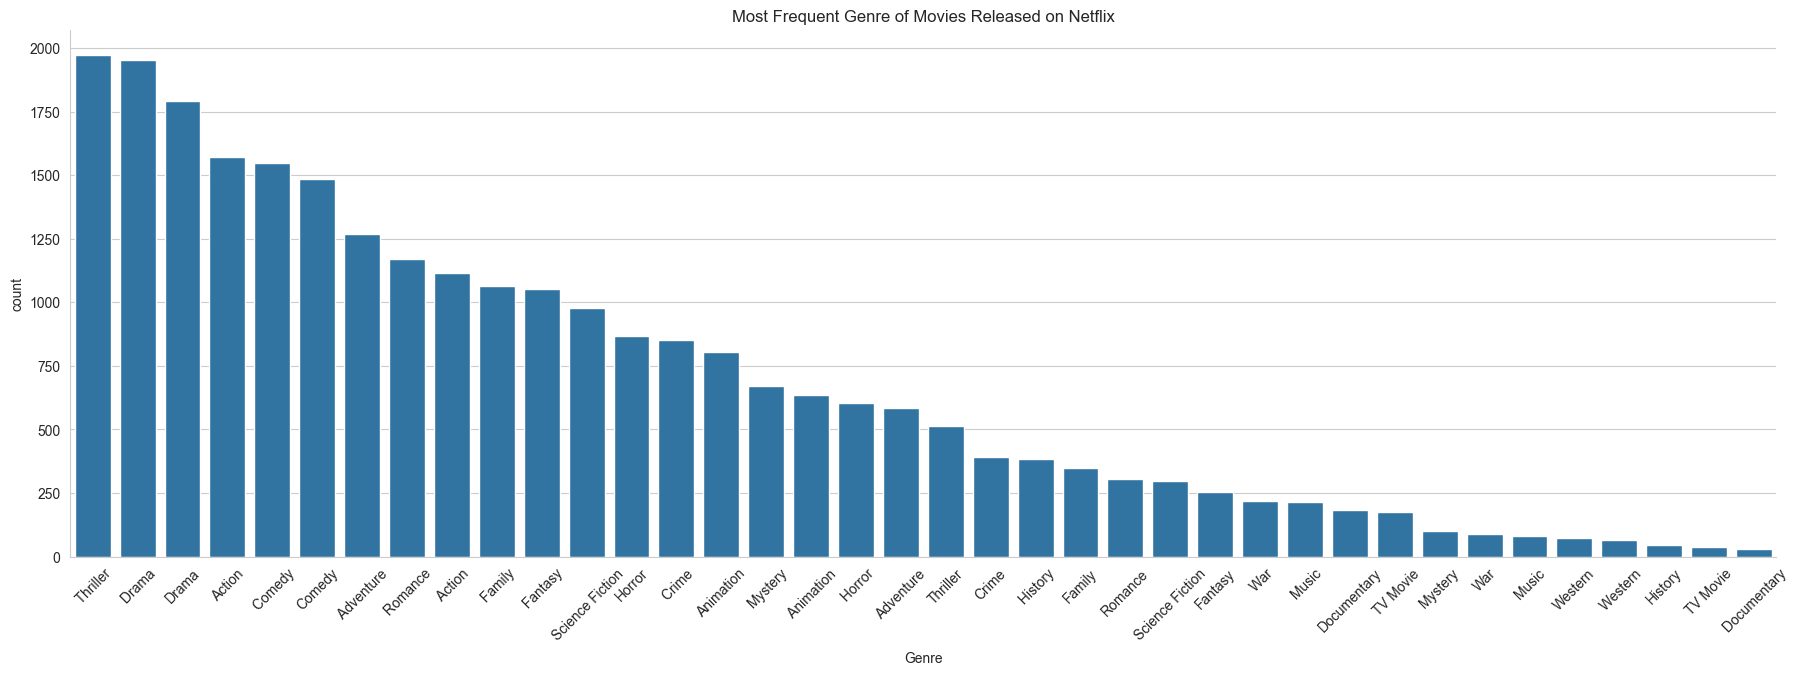

In [50]:
# used catplot because it is used to plot categorical data
sns.catplot(x="Genre", kind="count", data=df, height=6, aspect=3, order=df['Genre'].value_counts().index) # order is used to sort the genres in descending order
plt.xticks(rotation=45) # rotating the x-axis labels to avoid overlap   
plt.title("Most Frequent Genre of Movies Released on Netflix") # title of the plot
plt.show() # to display the plot




### The most frequent genre of movies released on Netflix, according to this bar chart, is **Thriller**. It has the highest count compared to other genres. Right next to it is **Drama**, which also has a significant number of releases but is slightly lower than Thriller. The graph shows Thriller as the leading genre by a noticeable margin.


### Q2-What genres has highest votes?

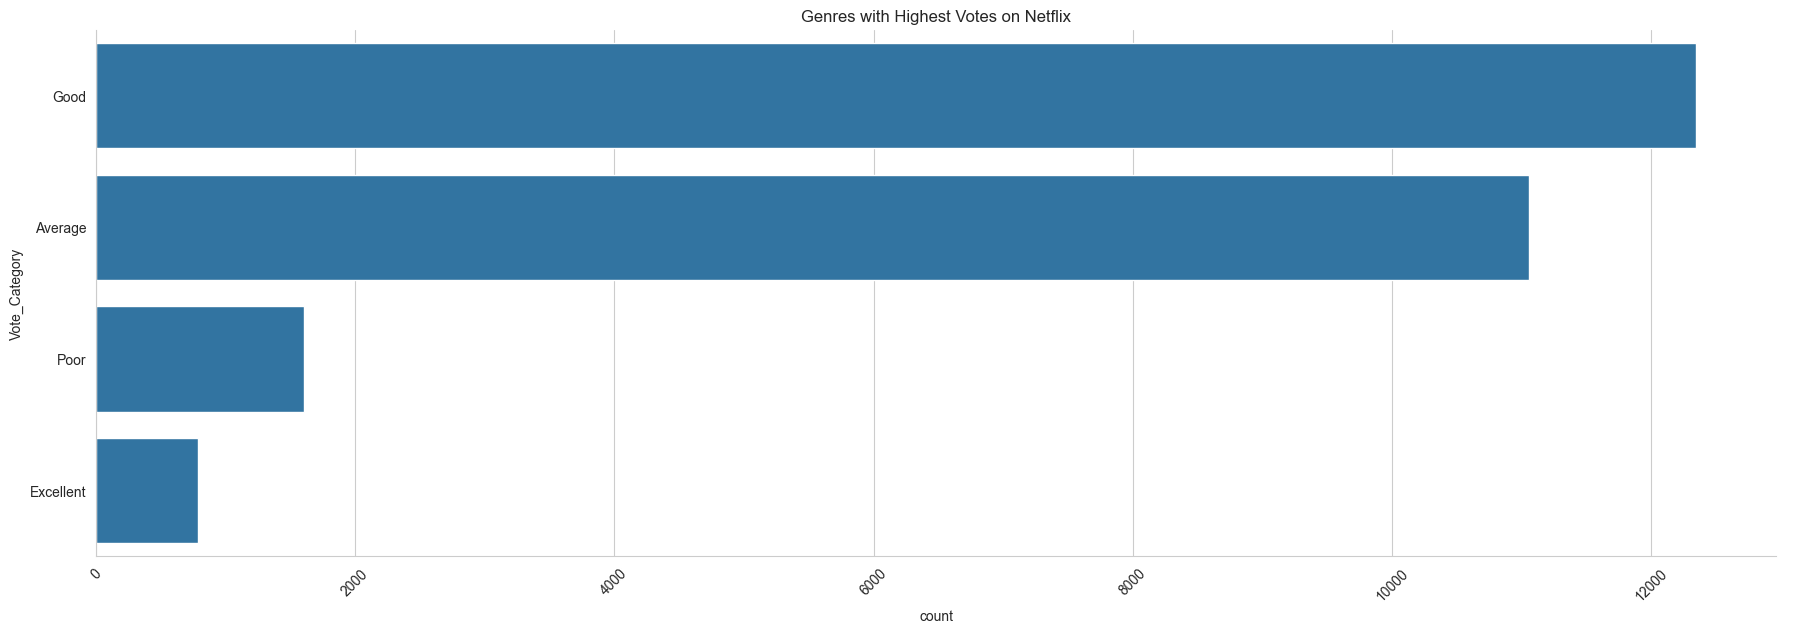

In [58]:
# find highest voted genre
# used catplot because it is used to plot categorical data

sns.catplot(y="Vote_Category", kind="count", data=df, height=6, aspect=3, order=df['Vote_Category'].value_counts().index) # order is used to sort the genres in descending order
plt.xticks(rotation=45) # rotating the x-axis labels to avoid overlap   
plt.title("Genres with Highest Votes on Netflix") # title of the plot
plt.show() # to display the plot


### The chart shows that the genre with the highest votes on Netflix is **Good**, with approximately **12,500** votes.
It’s followed by **Average** with around **11,000** votes, while **Poor** and **Excellent** categories have much lower vote counts, roughly **1,500** and **800**, respectively.




### Q3- What movie got the highest popularity? what's its genre?

In [ ]:
# find the movie with highest popularity
df[df["Popularity"] == df["Popularity"].max()] # to find the row with the highest popularity




,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre,Vote_Category
0,2021,Spider-Man: No Way Home,5083.954,8940,8.3,Action,Excellent
1,2021,Spider-Man: No Way Home,5083.954,8940,8.3,Adventure,Excellent
2,2021,Spider-Man: No Way Home,5083.954,8940,8.3,Science Fiction,Excellent


### The movie with the highest popularity is **Spider-Man: No Way Home**, with a popularity score of **5083.954**.

Its genres are:

* **Action**
* **Adventure**
* **Science Fiction**




### Q4- What movie got the lowest popularity? what's its genre?

In [63]:
# find the movie with lowest popularity
df[df["Popularity"] == df["Popularity"].min()] # to find the row with the lowest popularity

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre,Vote_Category
25787,2021,The United States vs. Billie Holiday,13.354,152,6.7,Music,Good
25788,2021,The United States vs. Billie Holiday,13.354,152,6.7,Drama,Good
25789,2021,The United States vs. Billie Holiday,13.354,152,6.7,History,Good
25790,1984,Threads,13.354,186,7.8,War,Good
25791,1984,Threads,13.354,186,7.8,Drama,Good
25792,1984,Threads,13.354,186,7.8,Science Fiction,Good


### The movie with the lowest popularity is a tie between:

1. **The United States vs. Billie Holiday** (2021)

   * Popularity: **13.354**
   * Genres: **Music**, **Drama**, **History**

2. **Threads** (1984)

   * Popularity: **13.354**
   * Genres: **War**, **Drama**, **Science Fiction**

Both movies have the same lowest popularity score of **13.354**, and each belongs to multiple genres as listed above.


### Q5- Which year has the most filmmed movies?

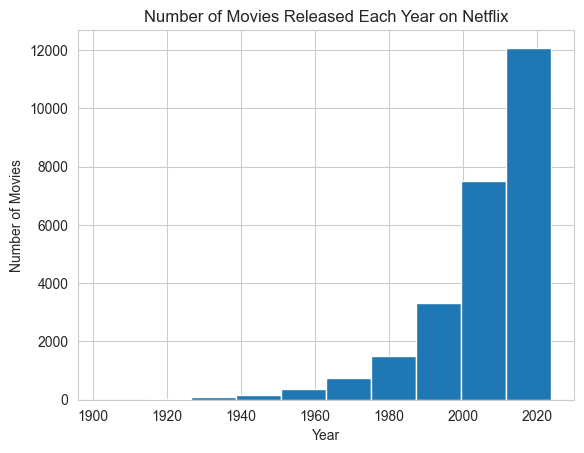

In [ ]:
# find the which year has the most filmed movies
# used histogram because it is used to plot numerical data

df["Release_Date"].hist() # histogram to plot the Release_Year column
plt.title("Number of Movies Released Each Year on Netflix") # title of the plot
plt.xlabel("Year") # x-axis label
plt.ylabel("Number of Movies") # y-axis label   
plt.show() # to display the plot


